In [2]:
import FFTW

using Interact
using PyPlot

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='/assetserver/05a54a8cd5b6d9c9183d90a9a0f9abc6032d3417-assets/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='/assetserver/05a54a8cd5b6d9c9183d90a9a0f9abc6032d3417-assets/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

In [10]:
# Solve a 1D Poisson equation ∇²ϕ = d²ϕ/dx² = f(x) with periodic boundary
# conditions and domain length L using the Fourier-spectral method. Solutions to
# Poisson's equation with periodic boundary conditions are unique up to a
# constant so you may need to appropriately normalize the solution if you care
# about the numerical value of the solution itself and not just derivatives of
# the solution.
function solve_poisson_1d_pbc(f, L, wavenumbers)
    N = length(f)  # Number of grid points (excluding the periodic end point).
    n = 0:N        # Wavenumber indices.

    if wavenumbers == :second_order
        # Wavenumbers if Laplacian is discretized using second-order
        # centered-difference scheme. Gives second-order convergence and ensures
        # that ∇²ϕ == f(x) to machine precision.
        Δx = L / N
        k² = @. (4 / Δx^2) * sin(π*n / N)^2
    elseif wavenumbers == :analytic
        # Wavenumbers if the derivatives are not discretized, should give
        # spectral convergence so that ϕ is accurate but ∇²ϕ ≈ f(x) as the ∇²
        # operator must be discretized.
        k² = @. ((2*π / L) * n)^2
    end

    # Forward transform the real-valued source term.
    fh = FFTW.rfft(f)

    # Calculate the Fourier coefficients of the source term.
    # We only need to compute the first (N-1)/2 + 1 Fourier coefficients
    # as ϕh(N-i) = ϕh(i) for a real-valued f.
    ϕh = - fh ./ k²[1:Int(N/2 + 1)]

    # Setting the DC/zero Fourier component to zero.
    ϕh[1] = 0

    # Take the inverse transform of the . We need to specify that the input f
    # had a length of N as an rrft of length N/2 may have come from an array
    # of length N (if N is even) or N-1 (if N is odd).
    ϕ = FFTW.irfft(ϕh, N)
end

solve_poisson_1d_pbc (generic function with 2 methods)

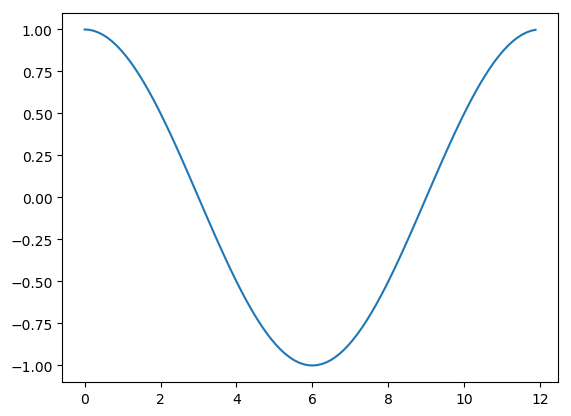

In [3]:
H = 12
Nz = 100
Δz = H / Nz
z = Δz * (0:(Nz-1))

f = cos.(2*π*z ./ H)
ϕs = -(H / (2π))^2 * cos.((2π / H) .* z)

PyPlot.plot(z, f);

In [4]:
fh = FFTW.rfft(f)

51-element Array{Complex{Float64},1}:
 -2.6645352591003757e-15 + 0.0im                   
                    50.0 - 4.533509791047258e-15im 
   -2.29527681353744e-15 - 4.4356721081793526e-15im
  2.8878224431804872e-15 - 3.88157458140812e-15im  
   5.366937815981507e-15 + 2.3000803655732416e-15im
 -1.2891812564629638e-15 - 2.4218730928321553e-16im
 -2.4927320736835633e-15 - 4.547266848879591e-16im 
  -2.195846040186857e-17 + 2.350997288907644e-16im 
   1.605578720172921e-16 - 1.211658251011312e-15im 
  4.0400128819420574e-15 + 1.9586377435532932e-15im
    9.13656946627439e-17 + 1.3869316562667265e-15im
 -1.1658071396441137e-15 + 1.295949624633798e-16im 
   -6.88405064177565e-16 - 2.554762762188651e-16im 
                         ⋮                         
 -2.5125022304515263e-15 + 8.02419359486236e-16im  
  -9.733570534991373e-16 - 3.377707704043929e-15im 
  2.5125022304515263e-15 - 2.890652065502909e-15im 
  1.5268733983023799e-15 + 3.2071562320802228e-15im
 -1.6814909758496512e-15 +

In [5]:
n = 0:Nz
kz² = @. (4 / Δz^2) * sin(π*n / Nz)^2

ϕh = - fh ./ kz²[1:Int(Nz/2 + 1)]; ϕh[1] = 0; ϕh

51-element Array{Complex{Float64},1}:
                     0.0 + 0.0im                   
     -182.43814240158895 + 1.6541702096761547e-14im
  2.0957979800831355e-15 + 4.050174946134772e-15im 
  -1.173861904350222e-15 + 1.5778090999912551e-15im
 -1.2299758238974968e-15 - 5.271242819792253e-16im 
  1.8964945573774546e-16 + 3.5627799552537456e-17im
   2.555792195469034e-16 + 4.662301755482145e-17im 
  1.6611959489539347e-18 - 1.7785705832102524e-17im
  -9.345829499397742e-18 + 7.052878369159378e-17im 
  -1.868549182233666e-16 - 9.05890911973827e-17im  
 -3.4444583140724414e-18 - 5.228689271298447e-17im 
   3.657645219692039e-17 - 4.065958929493708e-18im 
  1.8287611559216356e-17 + 6.7867759044848835e-18im
                         ⋮                         
  1.0217385344652763e-17 - 3.2631325475109864e-18im
   3.874021530469511e-18 + 1.3443486459627857e-17im
   -9.80845966116736e-18 + 1.1284704083172118e-17im
  -5.859110658562561e-18 - 1.2306903299218536e-17im
   6.355818503545463e-18 -

In [6]:
ϕ = FFTW.irfft(ϕh, Nz)

100-element Array{Float64,1}:
 -3.648762848031779 
 -3.6415628480317785
 -3.619991263142412 
 -3.584133226554117 
 -3.5341302535553276
 -3.4701796830362865
 -3.3925338986825957
 -3.3014993329321136
 -3.197435257626121 
 -3.0807523661274963
 -2.9519111525016433
 -2.811420094156791 
 -2.6598336451159663
  ⋮                 
 -2.6598336451159663
 -2.8114200941567904
 -2.9519111525016433
 -3.080752366127496 
 -3.1974352576261205
 -3.3014993329321136
 -3.392533898682595 
 -3.4701796830362865
 -3.534130253555328 
 -3.584133226554117 
 -3.6199912631424116
 -3.6415628480317785

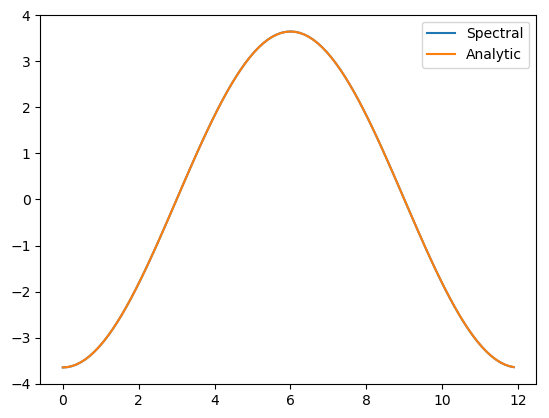

In [7]:
PyPlot.plot(z, ϕ, label="Spectral"); PyPlot.plot(z, ϕs, label="Analytic"); PyPlot.legend();

In [8]:
PyPlot.plot(z, ϕ - ϕa);

UndefVarError: UndefVarError: ϕa not defined

In [9]:
N = length(f)  # Number of grid points.

100

In [10]:
n = 0:(N-1)    # Wavenumber indices.

0:99

In [11]:
k² = @. (4 / Δz^2) * sin(π*n / N)^2  # Wavenumber squared.
@show size(f);
@show size(n);
@show size(k²);

size(f) = (100,)
size(n) = (100,)
size(k²) = (100,)


In [12]:
k²[1:Int(N/2 + 1)]

51-element Array{Float64,1}:
   0.0                
   0.27406549607339414
   1.0951803729891902 
   2.460104065459905  
   4.363449843245679  
   6.79770607011756   
   9.753265848853967  
  13.218464935275064  
  17.179627771685613  
  21.621121458053466  
  26.525417447923964  
  31.873160725584825  
  37.64324619147061   
   ⋮                  
 245.90461705219298   
 251.2523603298538    
 256.1566563197242    
 260.59815000609217   
 264.55931284250266   
 268.02451192892374   
 270.9800717076602    
 273.4143279345321    
 275.31767371231786   
 276.68259740478857   
 277.5037122817044    
 277.77777777777777   

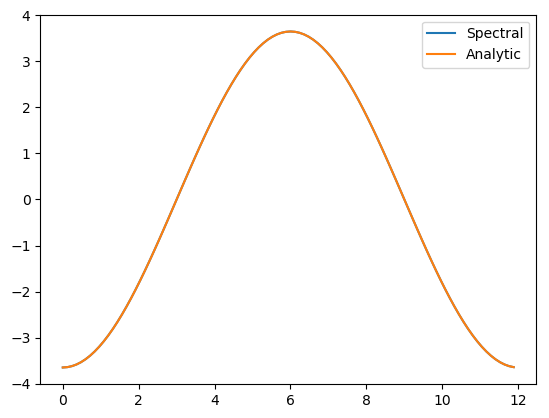

In [13]:
PyPlot.plot(z, solve_poisson_1d_pbc(f, Δz), label="Spectral"); PyPlot.plot(z, ϕs, label="Analytic"); PyPlot.legend();

In [14]:
using Statistics: mean
# minimum(solve_poisson_1d_pbc(f, Δz) - ϕs)
all(isapprox.(solve_poisson_1d_pbc(f, Δz), ϕs; atol=0.0015))

true

In [15]:
@doc ≈

```
isapprox(x, y; rtol::Real=atol>0 ? 0 : √eps, atol::Real=0, nans::Bool=false, norm::Function)
```

Inexact equality comparison: `true` if `norm(x-y) <= max(atol, rtol*max(norm(x), norm(y)))`. The default `atol` is zero and the default `rtol` depends on the types of `x` and `y`. The keyword argument `nans` determines whether or not NaN values are considered equal (defaults to false).

For real or complex floating-point values, if an `atol > 0` is not specified, `rtol` defaults to the square root of [`eps`](@ref) of the type of `x` or `y`, whichever is bigger (least precise). This corresponds to requiring equality of about half of the significand digits. Otherwise, e.g. for integer arguments or if an `atol > 0` is supplied, `rtol` defaults to zero.

`x` and `y` may also be arrays of numbers, in which case `norm` defaults to `vecnorm` but may be changed by passing a `norm::Function` keyword argument. (For numbers, `norm` is the same thing as `abs`.) When `x` and `y` are arrays, if `norm(x-y)` is not finite (i.e. `±Inf` or `NaN`), the comparison falls back to checking whether all elements of `x` and `y` are approximately equal component-wise.

The binary operator `≈` is equivalent to `isapprox` with the default arguments, and `x ≉ y` is equivalent to `!isapprox(x,y)`.

Note that `x ≈ 0` (i.e., comparing to zero with the default tolerances) is equivalent to `x == 0` since the default `atol` is `0`.  In such cases, you should either supply an appropriate `atol` (or use `norm(x) ≤ atol`) or rearrange your code (e.g. use `x ≈ y` rather than `x - y ≈ 0`).   It is not possible to pick a nonzero `atol` automatically because it depends on the overall scaling (the "units") of your problem: for example, in `x - y ≈ 0`, `atol=1e-9` is an absurdly small tolerance if `x` is the [radius of the Earth](https://en.wikipedia.org/wiki/Earth_radius) in meters, but an absurdly large tolerance if `x` is the [radius of a Hydrogen atom](https://en.wikipedia.org/wiki/Bohr_radius) in meters.

# Examples

```jldoctest
julia> 0.1 ≈ (0.1 - 1e-10)
true

julia> isapprox(10, 11; atol = 2)
true

julia> isapprox([10.0^9, 1.0], [10.0^9, 2.0])
true

julia> 1e-10 ≈ 0
false

julia> isapprox(1e-10, 0, atol=1e-8)
true
```

```
isapprox(x::FixedPoint, y::FixedPoint; rtol=0, atol=max(eps(x), eps(y)))
```

For FixedPoint numbers, the default criterion is that `x` and `y` differ by no more than `eps`, the separation between adjacent fixed-point numbers.


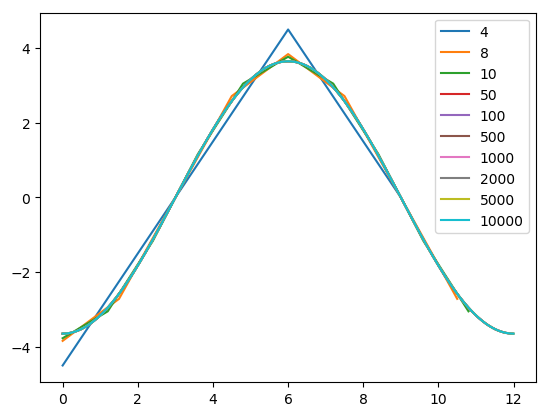

PyObject <matplotlib.legend.Legend object at 0x000000003029D748>

In [80]:
Ns = [4, 8, 10, 50, 100, 500, 1000, 2000, 5000, 10000]
error = []

for Nz in Ns
    H = 12           # Length of domain.
    Δz = H / Nz      # Grid spacing.
    z = Δz * (0:(Nz-1))  # Grid point locations.

    f = cos.(2*π*z ./ H)  # Source term.
    ϕa = @. -(H / (2π))^2 * cos((2π / H) * z)  # Analytic solution.

    ϕs = solve_poisson_1d_pbc(f, H)

    # Maximum error should be around 0.06.
    PyPlot.plot(z, ϕs, label=string(Nz));
    append!(error, maximum(abs.(ϕs - ϕa)))
end
PyPlot.legend()

In [81]:
error

10-element Array{Any,1}:
 0.8524373888758419   
 0.19342764654557199  
 0.12240633267568946  
 0.0048037923043295905
 0.0012002369076196118
 4.800037899554965e-5 
 1.2000023687619432e-5
 3.000001480124581e-6 
 4.800000379390212e-7 
 1.2000000193523874e-7

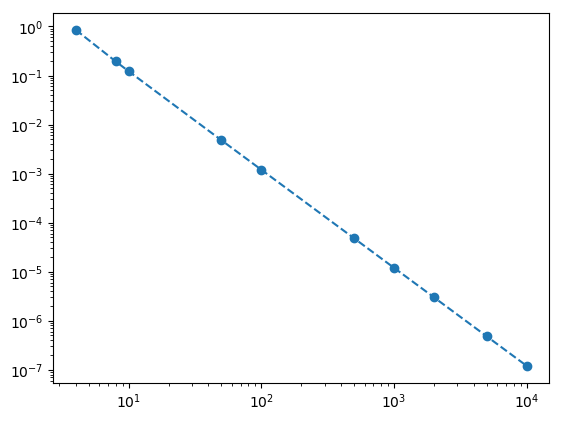

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000304ADA90>

In [82]:
PyPlot.loglog(Ns, error, linestyle="--", marker="o")

In [83]:
(log10(error[end]) - log10(error[1])) / (log10(Ns[end]) - log10(Ns[1]))

-2.0163632140572307

In [84]:
laplacian1d(f) = circshift(f, 1) - 2 .* f + circshift(f, -1)

laplacian1d (generic function with 1 method)

In [125]:
N = 100
A = rand(N)
A .= A .- mean(A)

100-element Array{Float64,1}:
 -0.22066419533407006 
 -0.10039722494206332 
  0.20353049476350565 
  0.016333938640534507
 -0.41820294902822647 
  0.38311774124638814 
  0.3262567924918142  
  0.06120885256817438 
  0.3313730343266656  
  0.07939820791818913 
  0.12671021066666394 
  0.41349396291906565 
  0.07909064195519039 
  ⋮                   
 -0.11095138532746357 
 -0.19622147813013574 
  0.2648328465836553  
  0.22669603598912452 
 -0.0928755507288826  
  0.3735990214598092  
 -0.4663085573920525  
 -0.4829426340697474  
  0.48307663388157857 
  0.17197732783592973 
 -0.4284420607550364  
  0.36231438463904436 

In [126]:
B = solve_poisson_1d_pbc(A, N)

100-element Array{Float64,1}:
 -2.480702599595551  
 -2.288616562212209  
 -2.1969277497709254 
 -1.9017084425661415 
 -1.5901551967208196 
 -1.6968048999037249 
 -1.4203368618402419 
 -0.8176120312849473 
 -0.15367834816147394
  0.84162836928866   
  1.9163332946569873 
  3.117748430691975  
  4.732657529646032  
  ⋮                  
 -5.9886833026018875 
 -5.791639039197756  
 -5.790816253923768  
 -5.52516062206612   
 -5.032808954219351  
 -4.63333283710146   
 -3.8602576985237578 
 -3.553491117338116  
 -3.7296671702222186 
 -3.4227665892247416 
 -2.9438886803913342 
 -2.8934528323129642 

In [127]:
Ar = laplacian1d(B)

100-element Array{Float64,1}:
 -0.22066419533407133 
 -0.10039722494205838 
  0.20353049476350038 
  0.016333938640537893
 -0.4182029490282271  
  0.3831177412463882  
  0.3262567924918116  
  0.06120885256817879 
  0.33137303432666065 
  0.07939820791819341 
  0.12671021066666066 
  0.4134939629190688  
  0.07909064195518756 
  ⋮                   
 -0.11095138532745974 
 -0.196221478130143   
  0.26483284658365935 
  0.22669603598912147 
 -0.09287555072887876 
  0.37359902145981216 
 -0.4663085573920607  
 -0.4829426340697447  
  0.48307663388157973 
  0.17197732783593045 
 -0.42844206075503743 
  0.3623143846390433  

In [129]:
A ≈ Ar

true

In [3]:
function solve_poisson_1d_nbc(f, L)
    @show N = length(f)  # Number of grid points (excluding the periodic end point).
    n = 0:(N-1)        # Wavenumber indices.

    # Wavenumbers for second-order convergence.
    @show Δx = L / N
    k² = @. (2 / Δx^2) * (cos(π*n / N) - 1)

    # Wavenumbers for spectral convergence.
    # k² = @. ((2*π / L) * n)^2

    # Forward transform the real-valued source term.
    fh = FFTW.dct(f)

    # Calculate the Fourier coefficients of the source term.
    # We only need to compute the first (N-1)/2 + 1 Fourier coefficients
    # as ϕh(N-i) = ϕh(i) for a real-valued f.
    ϕh = fh ./ k²

    # Setting the DC/zero Fourier component to zero.
    ϕh[1] = 0

    # Take the inverse transform of the . We need to specify that the input f
    # had a length of N+1 as
    ϕ = FFTW.idct(ϕh)
end

solve_poisson_1d_nbc (generic function with 1 method)

In [176]:
A = rand(10)
A[1] = A[2]; A[end] = A[end-1];
A .= A .- mean(A)

10-element Array{Float64,1}:
 -0.4290344037067704 
 -0.4290344037067704 
  0.23049995387624334
  0.11560349104623868
 -0.07876299415931665
 -0.28566198066263615
 -0.08388495591013845
  0.3393060233856888 
  0.3104846349187307 
  0.3104846349187307 

In [177]:
B = solve_poisson_1d_pbc_dct(A, 10)

N = length(f) = 10
Δx = L / N = 1.0


10-element Array{Float64,1}:
  2.90830864291437   
  2.4792742392076    
  1.6212054317940594 
  0.9936365782567624 
  0.4816712157657044 
 -0.10905714088467017
 -0.9854474781976816 
 -1.9457227714208305 
 -2.5666920412582916 
 -2.877176676177022  

In [179]:
Ar = laplacian1d(B)
Ar[1] = Ar[2]; Ar[end] = Ar[end-1];
Ar ≈ A

true

In [7]:
Nz = 10
f = rand(Nz)

10-element Array{Float64,1}:
 0.47585313684524055
 0.3322271613692811 
 0.3896573807181636 
 0.8748046145843555 
 0.06613908844364058
 0.3009070589711944 
 0.6267847733293888 
 0.3315750349154494 
 0.4655214178787608 
 0.705140257104661  

In [8]:
ϕ = solve_poisson_1d_pbc(f, Nz)

10-element Array{Float64,1}:
 -0.14380372042487516 
 -0.01496454621313692 
 -0.010759203048131195
 -0.07375747158097544 
  0.28118788205452233 
  0.24541133171764706 
  0.053680847935952604
  0.03187414506763332 
 -0.11521851530125016 
 -0.25365075020738637 